In [125]:
from tensorflow.keras.datasets import fashion_mnist

In [126]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [127]:
X_train.shape

(60000, 28, 28)

In [128]:
y_train.shape

(60000,)

In [129]:
X_test.shape

(10000, 28, 28)

In [130]:
y_test.shape

(10000,)

In [131]:
%matplotlib inline

In [132]:
import matplotlib.pyplot as plt

In [133]:
import seaborn as sns

In [134]:
sns.set(font_scale=2)

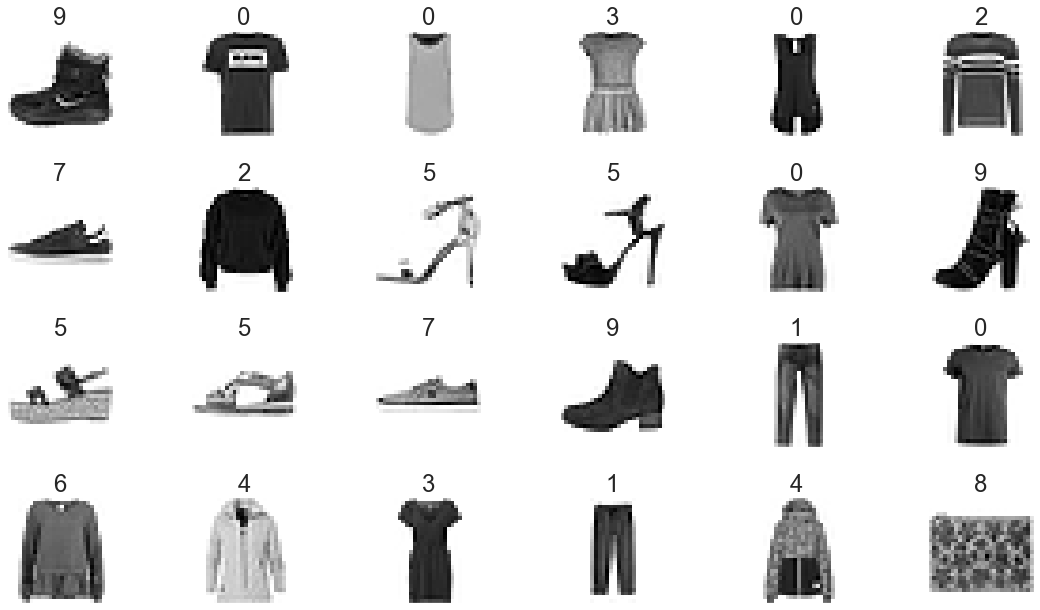

In [135]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [136]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [137]:
X_train.shape

(60000, 28, 28, 1)

In [138]:
X_train = X_train.astype('float32') / 255

In [139]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [140]:
X_test.shape

(10000, 28, 28, 1)

In [141]:
X_test = X_test.astype('float32') / 255

In [142]:
from tensorflow.keras.utils import to_categorical

In [143]:
y_train = to_categorical(y_train)

In [144]:
y_train.shape

(60000, 10)

In [145]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [146]:
y_test = to_categorical(y_test)

In [147]:
y_test.shape

(10000, 10)

In [148]:
from tensorflow.keras.models import Sequential

In [149]:
cnn = Sequential()

In [150]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [151]:
cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', 
               input_shape=(28, 28, 1)))

In [152]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [153]:
cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

In [154]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [155]:
cnn.add(Flatten())

In [156]:
cnn.add(Dense(units=128, activation='relu'))

In [157]:
cnn.add(Dense(units=10, activation='softmax'))

In [158]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [159]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png') 

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


FileNotFoundError: [Errno 2] No such file or directory: 'convnet.png'

In [160]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [161]:
cnn.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 52s 123ms/step - loss: 0.5326 - accuracy: 0.8061 - val_loss: 0.3642 - val_accuracy: 0.8638
Epoch 2/5
422/422 [==============================] - 49s 116ms/step - loss: 0.3330 - accuracy: 0.8811 - val_loss: 0.3185 - val_accuracy: 0.8828
Epoch 3/5
422/422 [==============================] - 54s 127ms/step - loss: 0.2816 - accuracy: 0.8986 - val_loss: 0.2957 - val_accuracy: 0.8937
Epoch 4/5
422/422 [==============================] - 53s 127ms/step - loss: 0.2503 - accuracy: 0.9094 - val_loss: 0.2682 - val_accuracy: 0.9047
Epoch 5/5
422/422 [==============================] - 53s 125ms/step - loss: 0.2258 - accuracy: 0.9176 - val_loss: 0.2602 - val_accuracy: 0.9065


In [169]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2674 - accuracy: 0.9073


In [170]:
loss

0.2673630118370056

In [171]:
accuracy

0.9072999954223633

In [165]:
predictions = cnn.predict(X_test)

In [166]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [167]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000826497%
1: 0.0000093605%
2: 0.0001161562%
3: 0.0000298581%
4: 0.0000185544%
5: 0.2573853126%
6: 0.0000779222%
7: 0.0964544015%
8: 0.0013700098%
9: 99.6444523335%


In [168]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [122]:
len(incorrect_predictions)

906

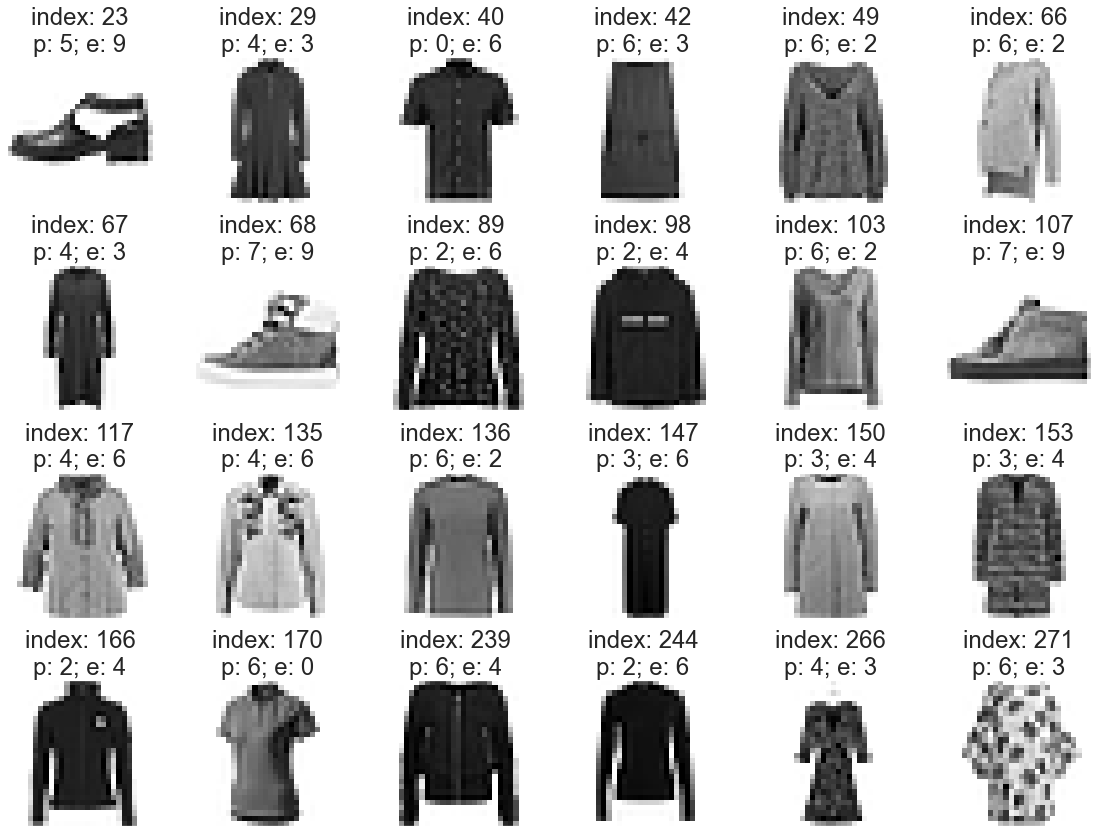

In [123]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [124]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################

In [10]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################

In [ ]:
#a) kernel size equal to 3-3 ; accuracy is 0.911899983882904
#    kernel size equal to 5-5 ; accuracy is 0.9103999733924866

# b) kernel size equal to 5-5 and batch size equal to 32 ; accuracy is 0.9093999862670898
# kernel size equal to 5-5 and batch size equal to 128 ; accuracy is  0.9072999954223633